# 🔧 05_hyperparameter_tuning.ipynb

## 🎯 Goal
Fine-tune the Random Forest Regressor using GridSearchCV to improve prediction accuracy on the Superstore dataset.

## ✅ Objectives
- Load the feature-engineered dataset
- Focus on tuning the Random Forest model
- Use GridSearchCV for hyperparameter optimization
- Evaluate the best model using cross-validation
- Save the optimized model and log the results



In [8]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib

# Path setup
PROJECT_ROOT = Path.cwd().parent
DATA_PATH = PROJECT_ROOT / "Data" / "Processed" / "feature_engineered_superstore.csv"
MODEL_DIR = PROJECT_ROOT / "Models" / "Artifacts"
MODEL_DIR.mkdir(parents=True, exist_ok=True)


In [9]:
df = pd.read_csv(DATA_PATH, encoding="ISO-8859-1")
X = df.drop(columns=["Sales"])
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)


In [11]:
grid_search.fit(X_train, y_train)
print("✅ Best Parameters:", grid_search.best_params_)
print("🔢 Best R² Score from CV:", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END ma

In [12]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"🎯 Test R²: {r2:.3f}")
print(f"📉 Test RMSE: {rmse:.3f}")
print(f"📈 Test MAE: {mae:.3f}")


🎯 Test R²: 0.591
📉 Test RMSE: 491.690
📈 Test MAE: 85.937


In [13]:
joblib.dump(best_model, MODEL_DIR / "random_forest_tuned.pkl")

# Optional: save the tuning result to CSV
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv(MODEL_DIR / "rf_gridsearch_results.csv", index=False)

print("✅ Tuned model and results saved.")


✅ Tuned model and results saved.


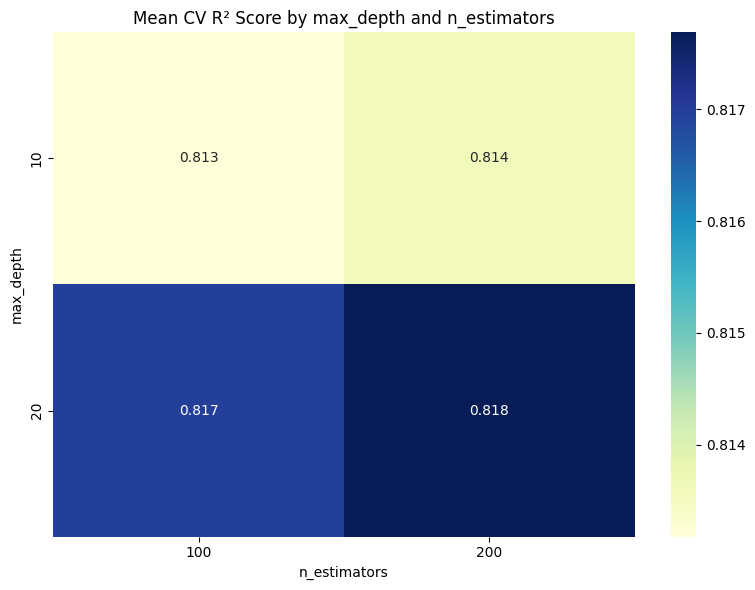

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the CV results to a heatmap-friendly format
pivot_table = results_df.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_n_estimators'
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Mean CV R² Score by max_depth and n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.tight_layout()
plt.show()
